In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame = pd.read_csv('Ads.csv')
dataFrame.head() ## Verilere genel bakış(kolonları sütünları görmek için)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
import random

Random Selection

In [15]:
N = 10000
line = 10 
result = 0
list = []

In [16]:
for i in range(0,N):
    ad = random.randrange(line)
    list.append(ad)
    reward = dataFrame.values[i,ad] ## verilerin i.satırı = 1 ise reward 1
    result += reward

In [17]:
result

1234

UCB

In [18]:
N = 10000
d = 10
adsSelected = []
numbersOfSelections = [0] * d
sumsOfRewards = [0] * d
totalReward = 0

In [19]:
import math
for n in range(0,N):
    ad = 0
    maxUpperBound = 0
    for i in range(0,d):
        if(numbersOfSelections[i] > 0):
            averageReward = sumsOfRewards[i] / numbersOfSelections[i]
            delta = math.sqrt(3/2 * math.log(n+1) / numbersOfSelections[i])
            upperBound = averageReward + delta
        
        else:
            upperBound = 1e400

        if (upperBound > maxUpperBound):
            maxUpperBound = upperBound
            ad = i

    adsSelected.append(ad)
    numbersOfSelections[ad] = numbersOfSelections[ad] + 1
    reward = dataFrame.values[n,ad]
    sumsOfRewards[ad] = sumsOfRewards[ad] + reward
    totalReward = totalReward + reward    

In [20]:
totalReward

2178

Text(0, 0.5, 'Number of times each ad was Selected')

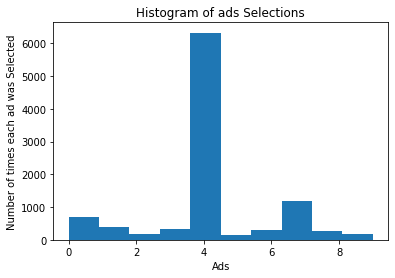

In [21]:
plt.hist(adsSelected)
plt.title('Histogram of ads Selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was Selected')

Thompson

In [22]:
N = 10000
d = 10
adsSelected = []
numbersOfSelections = [0] * d
sumsOfRewards = [0] * d
totalReward = 0
ones = [0] * d
zeros = [0] * d

In [23]:
import math
for n in range(0,N):
    ad = 0
    maxThompson  = 0
    
    for i in range(0,d):
        randBeta = random.betavariate(ones[i] + 1 , zeros[i] + 1)
        if randBeta > maxThompson:
            maxThompson = randBeta
            ad = i
        
    adsSelected.append(ad)
    reward = dataFrame.values[n,ad]

    if reward == 1:
        ones[ad] = ones[ad] + 1
    else:
        zeros[ad] = zeros[ad] + 1 

    totalReward = totalReward + reward  

In [24]:
totalReward

2600

Text(0, 0.5, 'Number of times each ad was Selected')

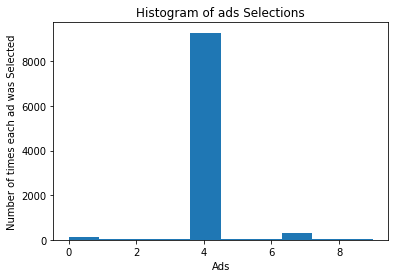

In [25]:
plt.hist(adsSelected)
plt.title('Histogram of ads Selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was Selected')